In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import data, color
from skimage.transform import hough_circle
from skimage.feature import peak_local_max, canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from PIL import Image
from PIL import ImageStat
import matplotlib

%matplotlib inline

pim = '18288798320_51510354d4.jpg'
img = Image.open(pim,'r').convert('L')
image = np.asarray(img)

(333, 500)

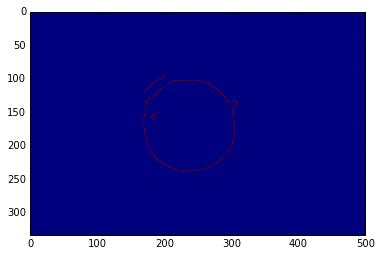

In [41]:
# Load picture and detect edges
edges = canny(image, sigma=2, low_threshold=100, high_threshold=150)
plt.imshow(edges)

In [56]:
f = np.extract(edges == 0, edges)
t = np.extract(edges == 1,edges)

In [57]:
len(t), len(f)

(588, 165912)

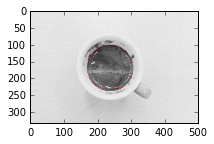

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 2))

# Detect two radii
hough_radii = np.arange(50, 70, 2)
hough_res = hough_circle(edges, hough_radii)

centers = []
accums = []
radii = []

for radius, h in zip(hough_radii, hough_res):
    # For each radius, extract two circles
    num_peaks = 2
    peaks = peak_local_max(h, num_peaks=num_peaks)
    centers.extend(peaks)
    accums.extend(h[peaks[:, 0], peaks[:, 1]])
    radii.extend([radius] * num_peaks)

# Draw the most prominent 5 circles
image = color.gray2rgb(image)
for idx in np.argsort(accums)[::-1][:1]:
    center_x, center_y = centers[idx]
    radius = radii[idx]
    cx, cy = circle_perimeter(center_y, center_x, radius)
    image[cy, cx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)

In [6]:
from skimage.data import camera
from skimage.filters import threshold_otsu
matplotlib.rcParams['font.size'] = 9

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:5907: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 333 x 500)
  '(shape is %d x %d)' % inp.shape[::-1])


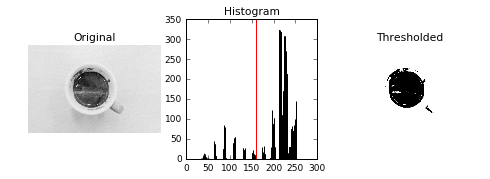

In [7]:
pim = '18288798320_51510354d4.jpg'
img = Image.open(pim,'r').convert('L')
image = np.asarray(img)
len(image)

thresh = threshold_otsu(image)
binary2 = image > thresh

fig = plt.figure(figsize=(8, 2.5))
ax1 = plt.subplot(1, 3, 1, adjustable='box-forced')
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1, adjustable='box-forced')

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')

ax2.hist(image)
ax2.set_title('Histogram')
ax2.axvline(thresh, color='r')

ax3.imshow(binary2, cmap=plt.cm.gray)
ax3.set_title('Thresholded')
ax3.axis('off')

plt.show()

In [13]:
f = np.extract(binary2 == 0, binary2)
t = np.extract(binary2 == 1,binary2)
print np.size(image)
len(t),len(f)

166500


(150834, 15666)

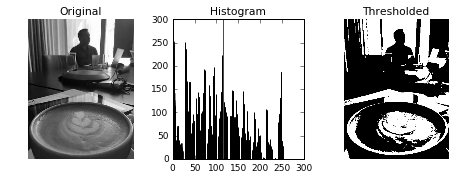

In [16]:
pim = '19534849018_d13f3f051a.jpg'
img = Image.open(pim,'r').convert('L')
image = np.asarray(img)

thresh = threshold_otsu(image)
binary = image > thresh

fig = plt.figure(figsize=(8, 2.5))
ax1 = plt.subplot(1, 3, 1, adjustable='box-forced')
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1, adjustable='box-forced')

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')

ax2.hist(image)
ax2.set_title('Histogram')
ax2.axvline(thresh, color='r')

ax3.imshow(binary, cmap=plt.cm.gray)
ax3.set_title('Thresholded')
ax3.axis('off')

plt.show()

In [17]:
f = np.extract(binary == 0, binary)
t = np.extract(binary == 1,binary)
len(t),len(f)

(68813, 118687)

In [18]:
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse

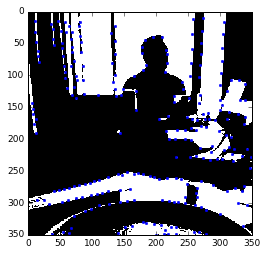

392

In [19]:
pim = '19534849018_d13f3f051a.jpg'
img = Image.open(pim,'r').convert('L')
pimg = np.asarray(img)

coords = corner_peaks(corner_harris(binary), min_distance=5,threshold_rel=0.001)
coords_subpix = corner_subpix(binary, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(binary, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.b', markersize=5)
# ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15,mew=2)
ax.axis((0, 350, 350, 0))
plt.show()
len(coords)

In [152]:
len(coords)

392

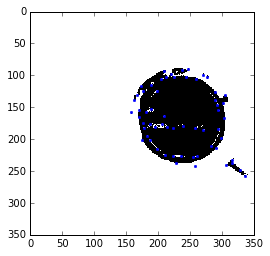

60

In [148]:
coords = corner_peaks(corner_harris(binary2), min_distance=5,threshold_rel=0.001)
coords_subpix = corner_subpix(binary2, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(binary2, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.b', markersize=5)
# ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15,mew=2)
ax.axis((0, 350, 350, 0))
plt.show()
len(coords)